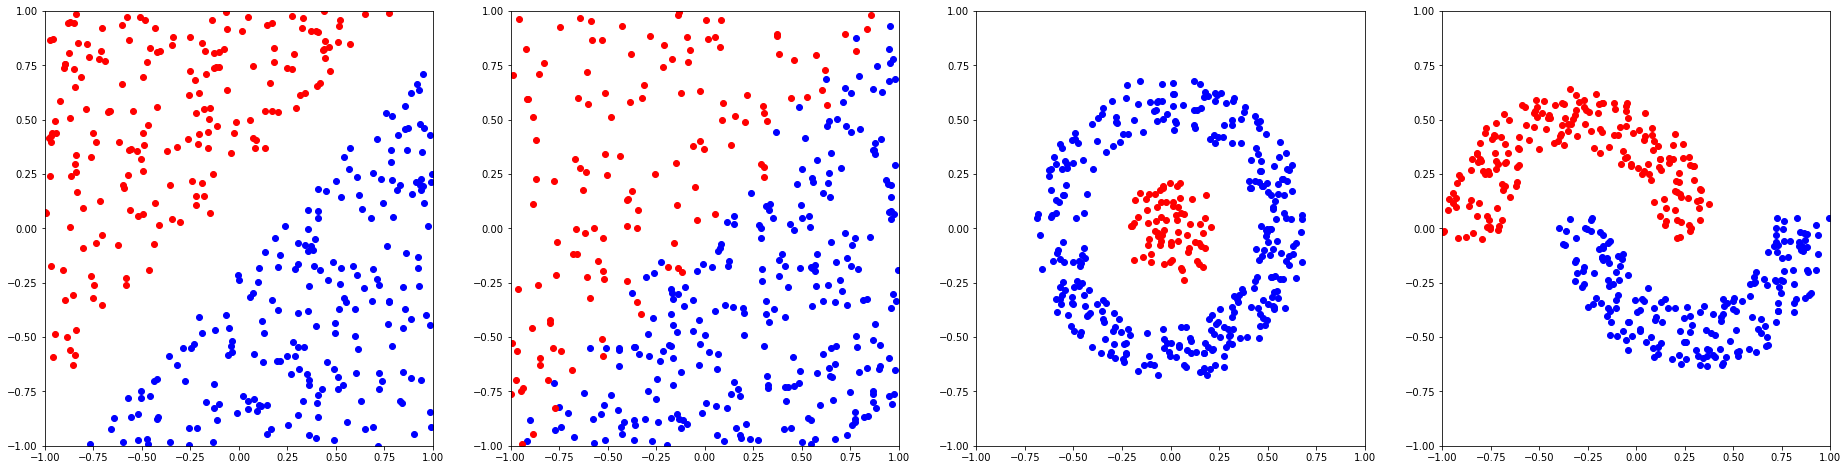

In [80]:
%matplotlib inline
from matplotlib import pyplot as plt
import math
import numpy as np

CWID, CHEI = 2, 2
n, d = 400, 2

X,Y = [], []
xi, yi = [], []
for i in range(n) :
    while 1 :
        posX = np.random.uniform(-CWID/2,CWID/2)
        posY = np.random.uniform(-CHEI/2,CHEI/2)
        if posY >= posX + 0.2 :
            xi.append([posX, posY])
            yi.append(1)
            break
        elif posY <= posX - 0.2 :
            xi.append([posX, posY])
            yi.append(0)
            break
X.append(xi); Y.append(yi)
xi, yi = [], []
for i in range(n) :
    while 1 :
        posX = np.random.uniform(-CWID/2,CWID/2)
        posY = np.random.uniform(-CHEI/2,CHEI/2)
        if posY >= posX - 0.1 and np.random.uniform(0,1) < 0.5 :
            xi.append([posX, posY])
            yi.append(1)
            break
        elif posY <= posX + 0.1 :
            xi.append([posX, posY])
            yi.append(0)
            break
X.append(xi); Y.append(yi)
xi, yi = [], []
for i in range(n) :
    while 1 :
        posX = np.random.uniform(-CWID/2,CWID/2)
        posY = np.random.uniform(-CHEI/2,CHEI/2)
        if math.sqrt(posX**2+posY**2) < 0.25 :
            xi.append([posX, posY])
            yi.append(1)
            break
        elif math.sqrt(posX**2+posY**2) > 0.45 and math.sqrt(posX**2+posY**2) < 0.7 :
            xi.append([posX, posY])
            yi.append(0)
            break
X.append(xi); Y.append(yi)
xi, yi = [], []
for i in range(n) :
    while 1 :
        posX = np.random.uniform(-CWID/2,CWID/2)
        posY = np.random.uniform(-CHEI/2,CHEI/2)
        if math.sqrt((posX+0.3)**2+(posY+0.05)**2)<0.7  and math.sqrt((posX+0.3)**2+(posY+0.05)**2)>0.4 and posY>-0.05 :
            xi.append([posX, posY])
            yi.append(1)
            break
        elif math.sqrt((posX-0.3)**2+(posY-0.05)**2)<0.7 and math.sqrt((posX-0.3)**2+(posY-0.05)**2)>0.4 and posY<0.05 :
            xi.append([posX, posY])
            yi.append(0)
            break
X.append(xi); Y.append(yi)


# plot
plt.figure(figsize=(32,8))
for k in range(4) :
    xi, yi = X[k], Y[k]    # get data set #i
    x0 = [ xi[i] for i in range(n) if yi[i] == 0 ]    # split 2 groups
    x1 = [ xi[i] for i in range(n) if yi[i] == 1 ]
    x0 = [ [ x0[j][i] for j in range(len(x0)) ] for i in range(d) ]    # transverse, make dimension first
    x1 = [ [ x1[j][i] for j in range(len(x1)) ] for i in range(d) ]
    
    plt.subplot(1,4,k+1)
    plt.ylim([-CWID/2,CWID/2])
    plt.xlim([-CWID/2,CWID/2])
    plt.scatter(x0[0], x0[1], color='blue')
    plt.scatter(x1[0], x1[1], color='red')

Accuracy = 100% (100/100) (classification)
Accuracy = 94% (94/100) (classification)
Accuracy = 100% (100/100) (classification)
Accuracy = 100% (100/100) (classification)


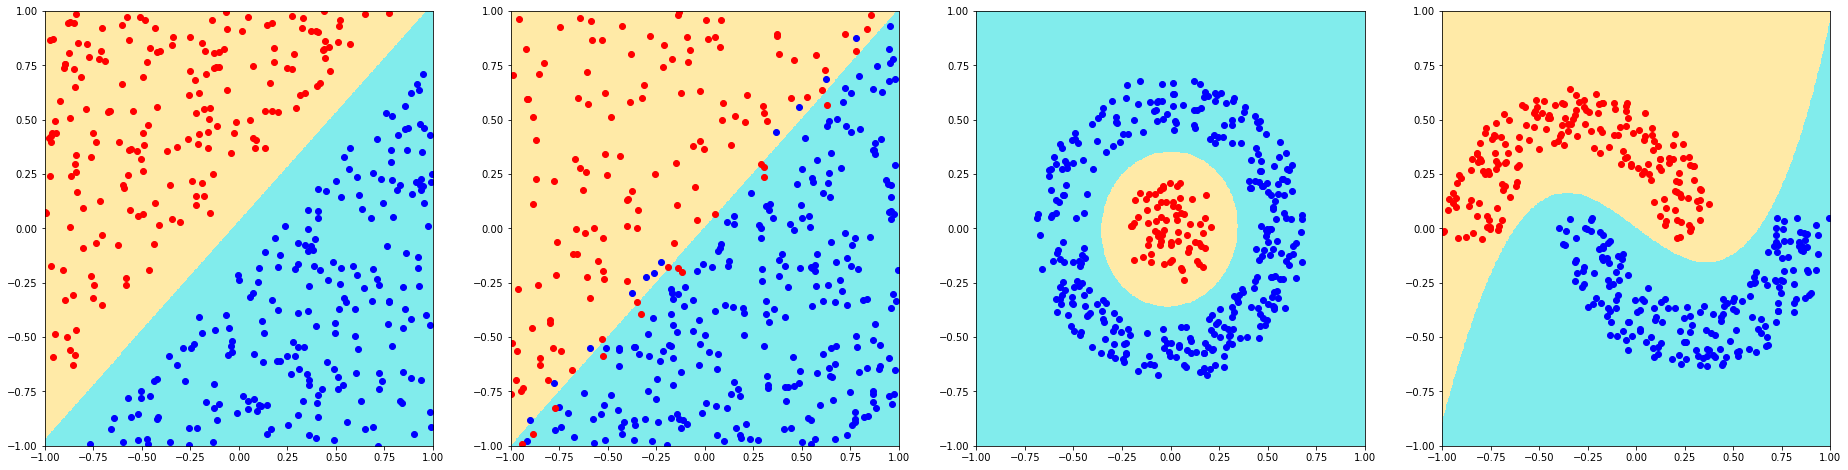

In [81]:
from libsvm.svmutil import *
import matplotlib as mpl

sp = math.floor(n*3/4)
tList = [0, 0, 2, 1]
plt.figure(figsize=(32,8))
cm_light = mpl.colors.ListedColormap(['#81ecec', '#ffeaa7'])    # Use light colors for hyperplane

for i in range(4) :
    trainX, trainY = X[i][:sp], Y[i][:sp]
    testX, testY = X[i][sp:], Y[i][sp:]
    # Construct a problem
    prob = svm_problem(trainY, trainX)
    # Set parameters: using diff kernels
    param = svm_parameter('-t '+str(tList[i])+' -c 4 -b 1 -d 5 -r 1')
    # Train, then predict
    m = svm_train(prob, param)
    _, acc, _ = svm_predict(testY, testX, m, '-b 1')
    # Visualizing separating hyperplane
    RESOL = 500
    tAxis = np.linspace(-1, 1, RESOL)
    tX = np.meshgrid(tAxis, tAxis)
    tXFlat = np.stack((tX[0].flat, tX[1].flat), axis=1)
    tY, _, _ = svm_predict([], tXFlat, m, '-b 1 -q')    # Use empty list if true labels are unavailable
    plt.subplot(1,4,i+1)
    plt.pcolormesh(tX[0], tX[1], np.array(tY).reshape(500,-1), cmap=cm_light)      # Notice X1, X2 & Y are grids
    plt.ylim([-CWID/2,CWID/2])
    plt.xlim([-CWID/2,CWID/2])
    x0 = [ X[i][k] for k in range(n) if Y[i][k] == 0 ]
    x1 = [ X[i][k] for k in range(n) if Y[i][k] == 1 ]
    x0 = [ [ x0[j][i] for j in range(len(x0)) ] for i in range(d) ]    # transverse, make dimension first
    x1 = [ [ x1[j][i] for j in range(len(x1)) ] for i in range(d) ]
    plt.scatter(x0[0], x0[1], color='blue')
    plt.scatter(x1[0], x1[1], color='red')

Using Linear kernel
Accuracy = 98% (49/50) (classification)
Using Gaussian kernel
Accuracy = 96% (48/50) (classification)
Using Sigmoidal kernel
Accuracy = 40% (20/50) (classification)
Using Polynomial kernel
Accuracy = 98% (49/50) (classification)


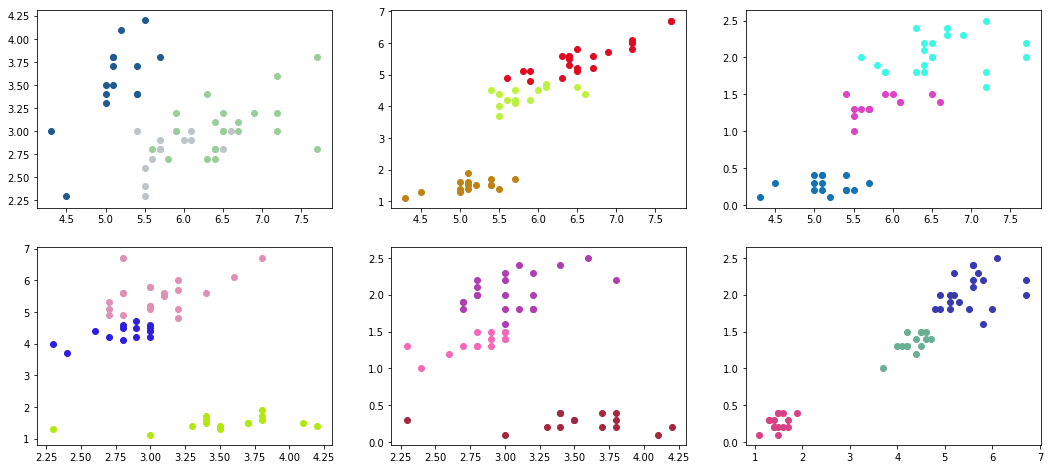

In [77]:
# Using UCI database iris

# read data
labels = ['Iris-setosa', 'Iris-versicolor', 'Iris-virginica']
FEATURES = 4; GROUPS = 3
fi = open('../databases/iris/iris.data')
X = []; tags = []
for i in range(FEATURES) :
    X.append([])
for line in fi :
    tmp = line.split(',')
    for i in range(FEATURES) :
        X[i].append(float(tmp[i]))    # X is dimension FIRST
    tags.append(labels.index(tmp[FEATURES].strip()))

# Splitting training & testing data
idx = np.array(range(len(X[0])))
np.random.shuffle(idx)
X = np.array(X)[:,idx]
tags = np.array(tags)[idx]
SPLIT = X.shape[1]//3*2
trainX, trainY = X[:,:SPLIT].T, tags[:SPLIT]
testX, testY = X[:,SPLIT:].T, tags[SPLIT:]

# Train SVM & predict
types = ['Linear', 'Gaussian', 'Polynomial', 'Sigmoidal']
for ker in [0,1,3,2] :
    prob = svm_problem(trainY, trainX)
    param = svm_parameter('-t '+str(ker)+' -c 4 -b 1 -d 5')
    m = svm_train(prob, param)
    print('Using',types[ker], 'kernel')
    labels, acc, _ = svm_predict(testY, testX, m, '-b 1')

# Scatter
plt.figure(figsize=(18, 8))
pair = [(0,1), (0,2), (0,3), (1,2), (1,3), (2,3)]
for k,p in enumerate(pair) :
    plt.subplot(2,3,k+1)
    for j in range(GROUPS) :
        plt.scatter([e for i,e in enumerate(testX[:,p[0]]) if labels[i] == j], [e for i,e in enumerate(testX[:,p[1]]) if labels[i] == j], \
                    c=np.random.rand(3))